In [1]:
import pandas as pd
import numpy as np


In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [5]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
geography = pd.get_dummies(['Geography'], drop_first=True)
gender = pd.get_dummies(['Gender'],drop_first=True)

In [8]:
X= X.drop(['Geography','Gender'],axis=1)

In [10]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [13]:
X= pd.concat([X,geography,gender ],axis=1)

In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X_train)
X= sc.transform(X_test)

In [16]:
X_train.shape

(8000, 8)

In [18]:
from tensorflow.keras.models import Sequential


In [19]:
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout


In [21]:
classifier = Sequential()

In [23]:
##Adding the input layer

classifier.add(Dense(units=11,activation='relu'))

In [24]:
##Adding 1st hidden layers
classifier.add(Dense(units=7,activation='relu'))

In [25]:
classifier.add(Dense(units=5, activation='relu'))

In [26]:
classifier.add(Dense(1, activation='sigmoid'))

In [27]:
classifier.compile(optimizer='Adam',loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
##customized learning rate
##import tensorflow
##opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.1)


In [29]:
import tensorflow as tf 
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    
)

In [30]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7044 - loss: 604.5767 - val_accuracy: 0.7039 - val_loss: 1.0629
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7451 - loss: 1.9733 - val_accuracy: 0.5873 - val_loss: 0.9569
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7613 - loss: 0.9948 - val_accuracy: 0.7959 - val_loss: 0.5442
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7738 - loss: 0.6763 - val_accuracy: 0.7959 - val_loss: 0.5478
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7872 - loss: 0.5727 - val_accuracy: 0.7955 - val_loss: 0.5737
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7911 - loss: 0.5534 - val_accuracy: 0.7955 - val_loss: 0.5093
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7926 - loss: 0.5115 - val_accuracy: 0.7955 - val_loss: 0.5032
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7882 - loss: 0.5086 

In [32]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

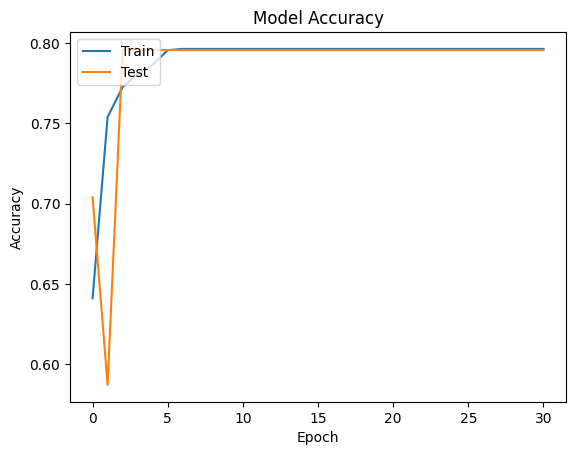

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')  # Corrected typo
plt.show()


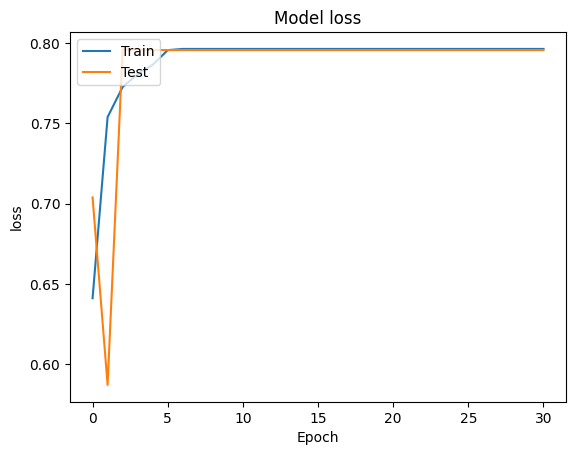

In [36]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')  # Corrected typo
plt.show()


In [37]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1595    0]
 [ 405    0]]


In [40]:
y_pred_classes = (y_pred > 0.5).astype(int)  # For binary classification
cm = confusion_matrix(y_test, y_pred_classes)


In [41]:
cm

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)  # Corrected argument order
print("Accuracy Score:", score)


Accuracy Score: 0.7975


In [43]:
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels
score = accuracy_score(y_test, y_pred_classes)


In [44]:
score

0.7975

In [45]:
classifier.get_weights()

[array([[ 0.06187924,  0.25473985,  0.25347984, -0.01765904,  0.10248693,
          0.619466  ,  0.3803323 , -0.21398377,  0.3375052 ,  0.10783125,
         -0.5784819 ],
        [ 0.23757678, -0.02003672,  0.05676448,  0.32184374,  0.3518345 ,
         -0.16570953, -0.46882513,  0.6040581 ,  0.38747972,  0.35525864,
         -0.513028  ],
        [ 0.3265491 , -0.30702177, -0.5639005 ,  0.19596882, -0.14417152,
          0.00810852,  0.31764764, -0.4105059 ,  0.5861574 , -0.39027902,
         -0.610981  ],
        [ 0.4561367 , -0.3599271 ,  0.10412306, -0.40690127, -0.15269569,
         -0.16277218,  0.17257509,  0.5410203 , -0.19386053,  0.03383432,
          0.39452457],
        [-0.43668342, -0.949803  , -0.18727027,  0.06766698,  0.725221  ,
          0.7108104 ,  0.29466125,  0.15483256,  0.8931408 ,  0.4997004 ,
         -0.28664762],
        [ 0.4733062 ,  0.20433164, -0.23660763,  0.55900437,  0.09160872,
          0.32150045,  0.23454359,  0.4311742 ,  0.09055018, -0.2107757